# Arima

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 36.0 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import yfinance as yf
from datetime import datetime
import statsmodels.api as sm

In [3]:
df = yf.download('TCS', start='2019-01-01',end='2022-04-01',progress=False)
df.to_csv('tcs.csv')

In [4]:
df = pd.read_csv('tcs.csv')

In [5]:
df.set_index('Date',inplace=True)

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,4.71,4.86,4.63,4.77,4.458913,456500
2019-01-02,4.72,5.08,4.69,4.95,4.627174,272500
2019-01-03,4.92,5.08,4.82,4.93,4.608478,256800
2019-01-04,5.01,5.15,4.95,5.12,4.786087,217600
2019-01-07,5.12,5.49,5.05,5.38,5.029130,246100


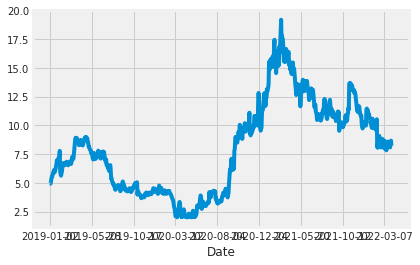

In [8]:
df['Close'].plot()
plt.show()

### Data Pre-Processing

In [9]:
df.shape

(819, 6)

In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
data=df.copy()

In [14]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [15]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [16]:
lag_features=['Open','High','Low','Volume','Adj Close']
window1=3
window2=7

In [17]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [18]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [19]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Openrolling_mean_3,Openrolling_mean_7,Highrolling_mean_3,Highrolling_mean_7,...,Openrolling_std_3,Openrolling_std_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Adj Closerolling_std_3,Adj Closerolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,4.72,5.08,4.69,4.95,4.627174,272500,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,4.92,5.08,4.82,4.93,4.608478,256800,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,5.01,5.15,4.95,5.12,4.786087,217600,4.883333,NaN,5.103333,NaN,...,0.148437,NaN,0.040415,NaN,0.130000,NaN,28275.843636,NaN,0.097594,NaN
2019-01-07,5.12,5.49,5.05,5.38,5.029130,246100,5.016667,NaN,5.240000,NaN,...,0.100166,NaN,0.219317,NaN,0.115326,NaN,20262.362482,NaN,0.211173,NaN
2019-01-08,5.47,5.69,5.38,5.55,5.188044,323200,5.200000,NaN,5.443333,NaN,...,0.240208,NaN,0.273008,NaN,0.225019,NaN,54632.133402,NaN,0.202440,NaN


In [20]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Openrolling_mean_3', 'Openrolling_mean_7', 'Highrolling_mean_3',
       'Highrolling_mean_7', 'Lowrolling_mean_3', 'Lowrolling_mean_7',
       'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Adj Closerolling_mean_3', 'Adj Closerolling_mean_7',
       'Openrolling_std_3', 'Openrolling_std_7', 'Highrolling_std_3',
       'Highrolling_std_7', 'Lowrolling_std_3', 'Lowrolling_std_7',
       'Volumerolling_std_3', 'Volumerolling_std_7', 'Adj Closerolling_std_3',
       'Adj Closerolling_std_7'],
      dtype='object')

In [21]:
data.isna().sum()

Open                       0
High                       0
Low                        0
Close                      0
Adj Close                  0
Volume                     0
Openrolling_mean_3         2
Openrolling_mean_7         6
Highrolling_mean_3         2
Highrolling_mean_7         6
Lowrolling_mean_3          2
Lowrolling_mean_7          6
Volumerolling_mean_3       2
Volumerolling_mean_7       6
Adj Closerolling_mean_3    2
Adj Closerolling_mean_7    6
Openrolling_std_3          2
Openrolling_std_7          6
Highrolling_std_3          2
Highrolling_std_7          6
Lowrolling_std_3           2
Lowrolling_std_7           6
Volumerolling_std_3        2
Volumerolling_std_7        6
Adj Closerolling_std_3     2
Adj Closerolling_std_7     6
dtype: int64

In [22]:
data.dropna(inplace=True)

In [23]:
ind_features=['Openrolling_mean_3', 'Openrolling_mean_7', 'Highrolling_mean_3',
       'Highrolling_mean_7', 'Lowrolling_mean_3', 'Lowrolling_mean_7',
       'Volumerolling_mean_3', 'Volumerolling_mean_7',
       'Adj Closerolling_mean_3', 'Adj Closerolling_mean_7',
       'Openrolling_std_3', 'Openrolling_std_7', 'Highrolling_std_3',
       'Highrolling_std_7', 'Lowrolling_std_3', 'Lowrolling_std_7',
       'Volumerolling_std_3', 'Volumerolling_std_7', 'Adj Closerolling_std_3',
       'Adj Closerolling_std_7']

In [24]:
training_data=data[0:701]
test_data=data[701:]

In [25]:
training_data

,Open,High,Low,Close,Adj Close,Volume,Openrolling_mean_3,Openrolling_mean_7,Highrolling_mean_3,Highrolling_mean_7,...,Openrolling_std_3,Openrolling_std_7,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Adj Closerolling_std_3,Adj Closerolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-10,5.48,5.74,5.37,5.71,5.337609,250700,5.480000,5.172857,5.686667,5.408571,...,0.010000,0.311326,0.055076,0.296503,0.055076,0.305388,64474.051628,40878.798790,0.089173,0.292007
2019-01-11,5.70,6.03,5.64,5.86,5.477826,388500,5.556667,5.312857,5.800000,5.544286,...,0.124231,0.293582,0.206640,0.335850,0.136504,0.301662,99777.469067,66331.275393,0.149663,0.304699
2019-01-14,5.80,5.92,5.78,5.88,5.496522,148500,5.660000,5.438571,5.896667,5.664286,...,0.163707,0.285624,0.146401,0.289128,0.208407,0.297081,120439.251631,80544.705126,0.086856,0.252951
2019-01-15,5.88,6.20,5.79,6.10,5.702174,260900,5.793333,5.562857,6.050000,5.814286,...,0.090185,0.255781,0.141067,0.247175,0.083865,0.263547,120080.195425,79044.685975,0.124482,0.231045
2019-01-16,6.07,6.15,5.92,5.99,5.599348,250900,5.916667,5.698571,6.090000,5.908571,...,0.138684,0.232625,0.149332,0.227993,0.078102,0.218893,62208.681066,78935.594602,0.102826,0.199823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-14,9.89,10.02,9.76,9.90,9.900000,350100,9.963333,10.064286,10.010000,10.161429,...,0.087369,0.123674,0.065575,0.150934,0.015276,0.111270,87840.157863,91854.965908,0.030550,0.146288
2021-10-15,10.03,10.21,9.93,10.12,10.120000,461500,9.953333,10.058571,10.056667,10.148571,...,0.070946,0.124288,0.138684,0.140645,0.107858,0.115429,102047.505277,96638.853963,0.147422,0.152253
2021-10-18,10.05,10.35,9.97,10.27,10.270000,332400,9.990000,10.054286,10.193334,10.154286,...,0.087178,0.123943,0.165630,0.148869,0.111505,0.098778,69988.165666,90077.937154,0.186101,0.152253


In [26]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 20.5 MB/s 
     |████████████████████████████████| 9.8 MB 51.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [27]:
from pmdarima import auto_arima

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
model=auto_arima(y=training_data['Close'],exogenous=training_data[ind_features],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-338.106, Time=7.98 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-221.436, Time=3.94 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-252.269, Time=8.85 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-286.887, Time=8.68 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3663.335, Time=1.43 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-328.736, Time=2.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-337.110, Time=2.73 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-335.061, Time=2.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-339.304, Time=3.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-327.765, Time=2.91 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-339.507, Time=3.07 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-339.273, Time=3.39 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=-335.426, Time=3.75 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=-338.039, Time=3.27 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept

In [30]:
model.fit(training_data['Close'],training_data[ind_features])

ARIMA(order=(4, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [31]:
forecast=model.predict(n_periods=len(test_data), exogenous=test_data[ind_features])

In [32]:
test_data['Forecast_ARIMA']=forecast

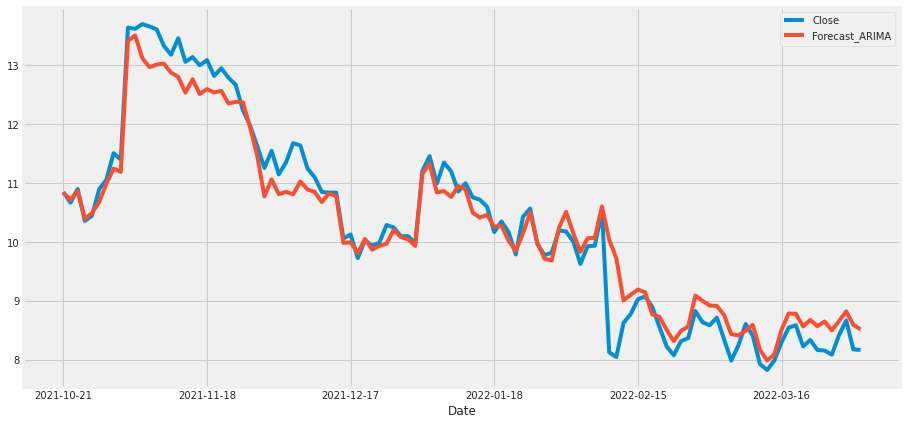

In [33]:
test_data[['Close','Forecast_ARIMA']].plot(figsize=(14,7))

#### Checking Accuracy of our model

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [35]:
np.sqrt(mean_squared_error(test_data['Close'],test_data['Forecast_ARIMA']))

0.37826752878851816

In [36]:
mean_absolute_error(test_data['Close'],test_data['Forecast_ARIMA'])

0.26494692467004716

### Why lag is important?

In [37]:
model1 = auto_arima(training_data['Close'],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=634.826, Time=1.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=635.068, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=635.551, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=635.251, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=633.296, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=631.911, Time=0.98 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=632.974, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=632.912, Time=1.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=632.449, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=632.799, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=630.265, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=633.504, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=633.798, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=631.332, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=631.2

In [38]:
model1.fit(training_data['Close'])

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [39]:
forecast1=model1.predict(n_periods=len(test_data))

In [40]:
test_data['Forecast_ARIMA1']=forecast1

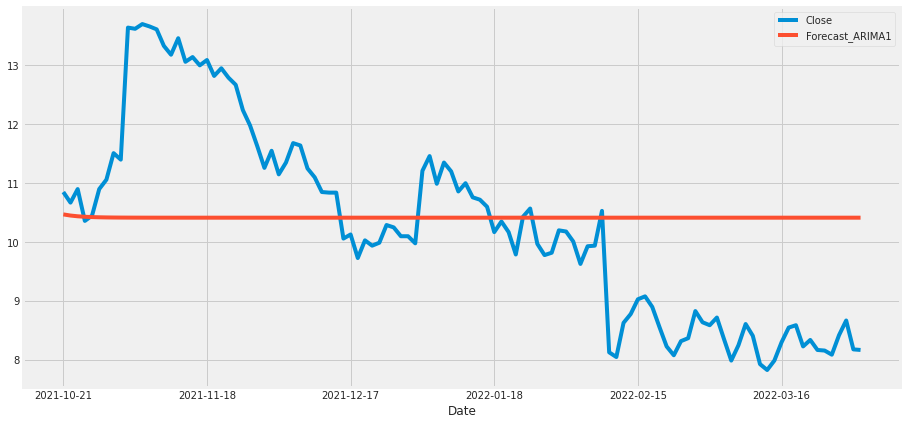

In [41]:
test_data[['Close','Forecast_ARIMA1']].plot(figsize=(14,7))